# Cellular Automata

- **Created by Andrés Segura Tinoco**
- **Created on Jul 08, 2019**

## Intro
A cellular automaton (abbrev. CA) is a discrete model studied in computer science, mathematics, physics, complexity science, theoretical biology and microstructure modeling.

A cellular automaton consists of a regular grid of cells, each in one of a finite number of states, such as on and off. The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule (generally, a mathematical function) that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously, though exceptions are known, such as the stochastic cellular automaton and asynchronous cellular automaton.

In [1]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. One-dimensional Cellular Automata

### Circular loop through an Automaton

In [2]:
# Get automata cells 
def get_cells(automaton, ix_start, ix_end, ix_max):
    cells = ''
    for i in range(ix_start, ix_end + 1):
        ix = i % ix_max
        cells += str(automaton[ix])
    return cells

In [3]:
# Test get_cells function
automaton = [0, 2, 0, 0, 1, 0, 0, 3, 1]
n_cell = len(automaton)
r = 1
for i in range(n_cell):
    ix_start = i - r
    ix_end = i + r
    print('(', ix_start, ',', ix_end, ') =', get_cells(automaton, ix_start, ix_end, n_cell))

( -1 , 1 ) = 102
( 0 , 2 ) = 020
( 1 , 3 ) = 200
( 2 , 4 ) = 001
( 3 , 5 ) = 010
( 4 , 6 ) = 100
( 5 , 7 ) = 003
( 6 , 8 ) = 031
( 7 , 9 ) = 310


### Apply evolution rule: 30

In [4]:
# Evolve the Automaton
def evolve_uni_automaton(init_state, max_gen, rule, r):
    universe = [init_state]
    n_cell = len(init_state)
    
    for g in range(max_gen):
        new_automaton = []
        automaton = universe[g]
        
        for i in range(n_cell):
            ix_start = i - r
            ix_end = i + r
            gen = get_cells(automaton, ix_start, ix_end, n_cell)
            cell = rule[gen]
            new_automaton.append(cell)
        universe.append(new_automaton)
    
    return universe

In [5]:
# Creates a cellular automata rule
def make_rule(byte, b_size = 8):
    rule = {}
    bits = bin(byte)[2:].zfill(b_size)
    
    for i in range(0, b_size):
        bin_key = bin(i)[2:].zfill(3)
        bin_value = bits[(b_size - i - 1)]
        rule[bin_key] = int(bin_value)
    
    return rule;

In [6]:
# Rule: bin(30) = 00011110
rule = make_rule(30)
rule

{'000': 0,
 '001': 1,
 '010': 1,
 '011': 1,
 '100': 1,
 '101': 0,
 '110': 0,
 '111': 0}

In [7]:
# Initial state of cellular automaton
n_cell = 43
init_state = list(np.zeros(n_cell).astype(int))
init_state[n_cell // 2] = 1

In [8]:
# Evolve the one-dimensional automaton
max_generations = 21
r = 1
universe = evolve_uni_automaton(init_state, max_generations, rule, r)

In [9]:
# Plot the Automaton evolution
def plot_automata(universe):
    fig, ax = plt.subplots(figsize = (12, 12))
    ax.set_title("Automaton Evolution ", fontsize = 20)
    plt.imshow(universe, cmap='Greys',  interpolation='nearest')
    plt.xlabel("Cells", fontsize = 11)
    plt.ylabel("Generations", fontsize = 11)
    plt.show()

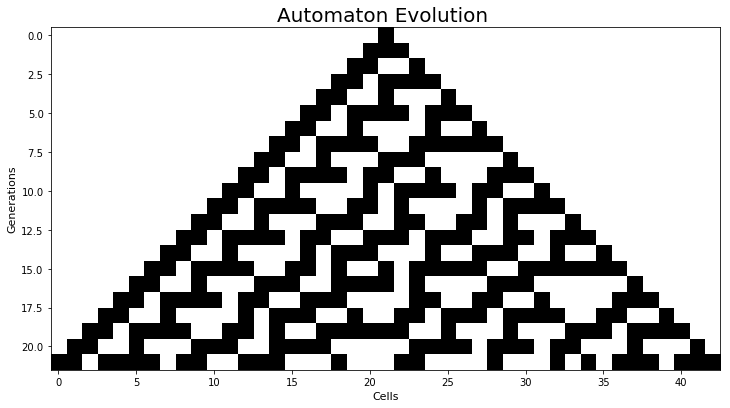

In [10]:
# Plotting automaton
plot_automata(universe)

### Apply evolution rule: 90

In [11]:
# Rule: bin(90) = 01011010
rule = make_rule(90)
rule

{'000': 0,
 '001': 1,
 '010': 0,
 '011': 1,
 '100': 1,
 '101': 0,
 '110': 1,
 '111': 0}

In [12]:
# Initial state of cellular automaton
n_cell = 257
init_state = list(np.zeros(n_cell).astype(int))
init_state[n_cell // 2] = 1

In [13]:
# Evolve the one-dimensional automaton
max_generations = 128
r = 1
universe = evolve_uni_automaton(init_state, max_generations, rule, r)

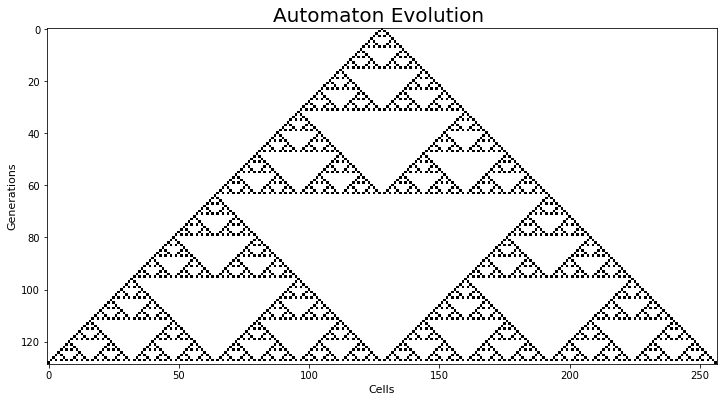

In [14]:
# Plotting automaton
plot_automata(universe)

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>